# Solution for Chapter 4

You just received data from a new experiment and after an initial QC visualization you notice a number of issues.

-   you want to create log transforms of area
    -   the responding column should be renamed to "log_size"
-   you want to apply a number of filters to remove problematic data
    -   you notice many single occurence trackIDs. you want to filter our any trackID that occurs less than 3 times
    -   you notice that some cells are unresonabely short and are probably artefacts. you want to filter out any cell with a `major_axis_length` of less than 20
    -   you notice that some cells have very low max intensity values. any cell with a `intensity_max` of less than 0.2 has to be removed
    -   you notice that quality sharpyl drops depending on x positions. any `x` coordinate > 100 and < 800 should be filtered out
    -   you notice that your data becomes problematic after frame 50. ensure your experiment has data from `frame` 0 to 50
-   before you apply the filters, ensure you create a copy of the experiment so you have a before reference
-   after you apply the filters, plot a QC histogram for log_size aggregated by experiment
-   create the same plot for the copied data without filters
-   finally, print out a filter_history


Loading sample at position pos1 for color channel YFP
Loading sample at position pos1 for color channel CFP
Loading sample at position pos2 for color channel YFP
Loading sample at position pos2 for color channel CFP
Loading sample at position pos3 for color channel YFP
Loading sample at position pos3 for color channel CFP
Loading sample at position pos4 for color channel YFP
Loading sample at position pos4 for color channel CFP
Loading sample at position pos5 for color channel YFP
Loading sample at position pos5 for color channel CFP
Loading sample at position pos6 for color channel YFP
Loading sample at position pos6 for color channel CFP
Successfully loaded data with consistent number of frames: 143
FluidExperiment with name: example_experiment
Path: ../../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: YFP, CFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, globalID, frame, labelID, trackID, lineag

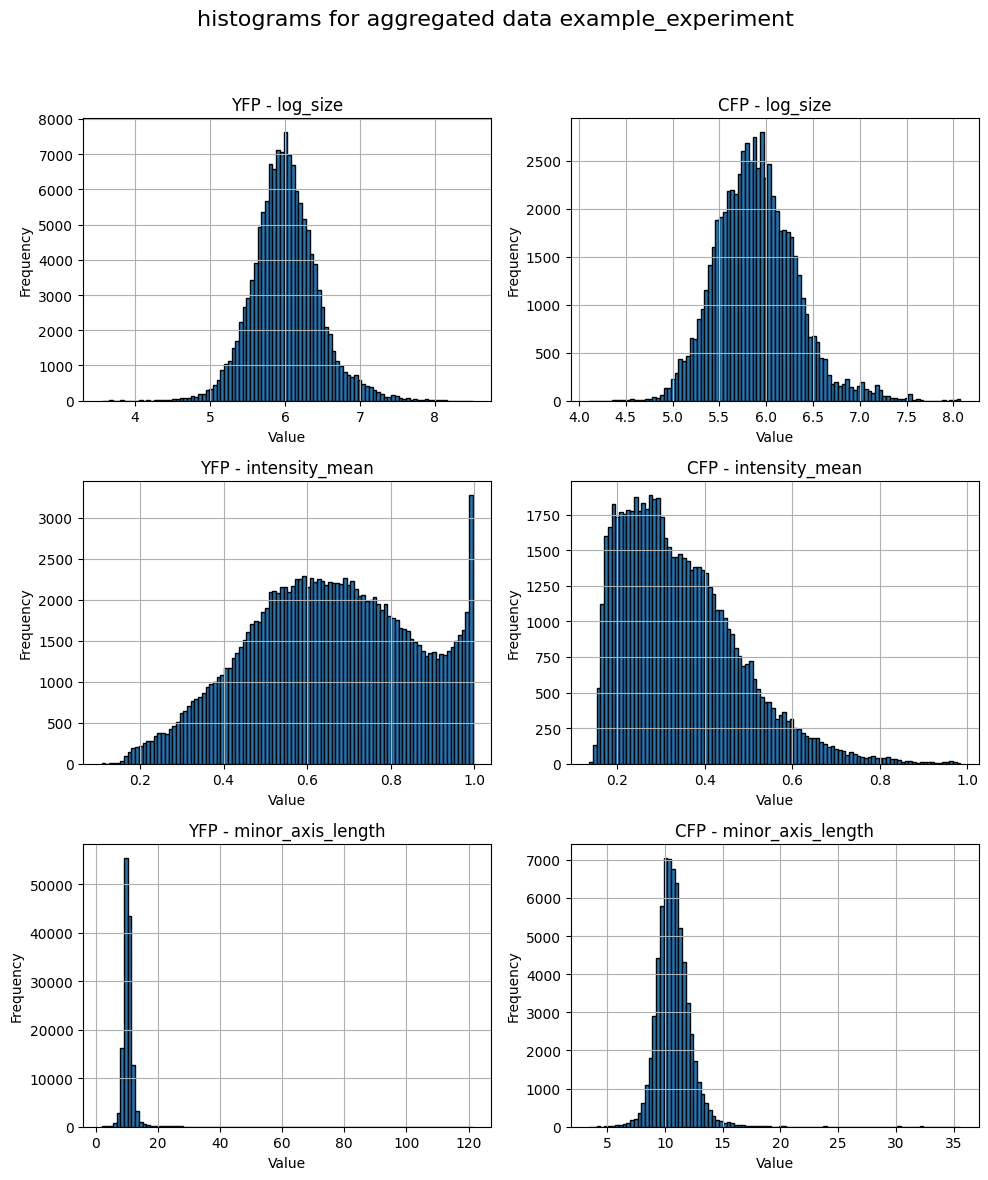

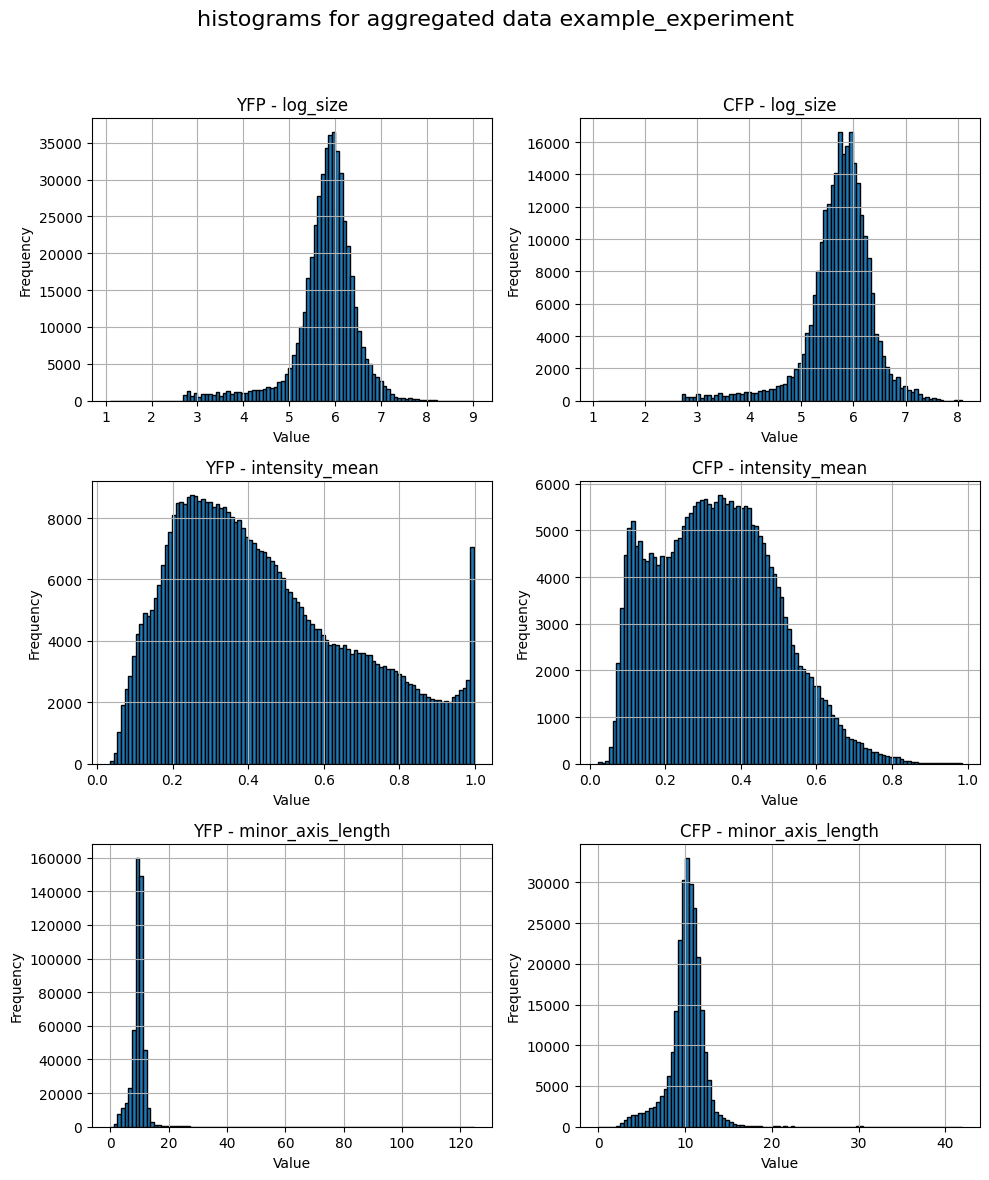

Filtering applied to color channel YFP at position pos1:
Number of filters applied: 5
Filter 1:
	column_filtered: trackID
	min_occurences: 3
	min_value: 
	max_value: 
	unique_values_before: 9350
	unique_values_after: 5099
	rows_before: 112168
	rows_after: 106427
	filter_rate_rows: 5
	filter_rate_unique_values: 45
Filter 2:
	column_filtered: major_axis_length
	min_occurences: 0
	min_value: 20
	max_value: 
	unique_values_before: 106311
	unique_values_after: 101574
	rows_before: 106427
	rows_after: 101600
	filter_rate_rows: 4
	filter_rate_unique_values: 4
Filter 3:
	column_filtered: intensity_max
	min_occurences: 0
	min_value: 0.2
	max_value: 
	unique_values_before: 244
	unique_values_after: 205
	rows_before: 101600
	rows_after: 92735
	filter_rate_rows: 8
	filter_rate_unique_values: 15
Filter 4:
	column_filtered: x
	min_occurences: 0
	min_value: 100
	max_value: 800
	unique_values_before: 92441
	unique_values_after: 80111
	rows_before: 92735
	rows_after: 80357
	filter_rate_rows: 13
	filter

In [ ]:
from fluid_experiment.fluid_experiment import FluidExperiment
PATH = "../../../data/midap-tools_example"
experiment = FluidExperiment(PATH,name = "example_experiment")
experiment.load_metadata_template()
print(experiment)

###YOUR SOLUTION HERE

#log transform and rename
experiment.calculate_transform_data(column="area", type = "log")
experiment.rename_data_column("area_log","log_size")

#create a reference
experiment_copy = FluidExperiment.from_copy(experiment)

#apply filters
experiment.filter_data(column= "trackID", min_occurences=3)
experiment.filter_data(column= "major_axis_length", min_value= 20)
experiment.filter_data(column= "intensity_max", min_value= 0.2)
experiment.filter_data(column="x", min_value=100, max_value=800)
experiment.filter_data(column="frame", max_value=50)

#plot qc of filtered vs original data
experiment.plot_qc_histograms(columns= "log_size",group_by="experiment")
experiment_copy.plot_qc_histograms(columns= "log_size",group_by="experiment")

#print out filter history
experiment.report_filter_history()
